In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import scanpy as sc
import anndata as ad
import pandas as pd
import seaborn as sns
from statannotations.Annotator import Annotator

In [2]:
in_dir = '../../results/06_endo/04_merge_clusters'
out_dir = '../../results/06_endo/05_find_markers'

os.makedirs(out_dir, exist_ok=True)

In [5]:
adata = sc.read_h5ad(f'{in_dir}/endothelial.h5ad')

In [13]:
del adata.uns["log1p"]

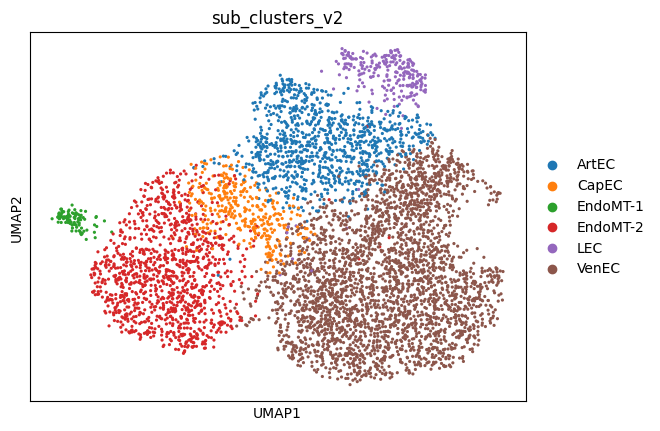

In [14]:
sc.pl.umap(adata, color="sub_clusters_v2")

In [15]:
sc.tl.rank_genes_groups(adata, 'sub_clusters_v2', method='wilcoxon')

In [16]:
# Extract marker genes, log fold changes, and p-values
df = pd.DataFrame(adata.uns['rank_genes_groups']['names'])

results = []
for cluster in adata.uns['rank_genes_groups']['names'].dtype.names:
    cluster_marker_genes = adata.uns['rank_genes_groups']['names'][cluster]
    logfoldchanges = adata.uns['rank_genes_groups']['logfoldchanges'][cluster]
    pvals = adata.uns['rank_genes_groups']['pvals'][cluster]
    pvals_adj = adata.uns['rank_genes_groups']['pvals_adj'][cluster]
    
    for gene, logfc, pval, pval_adj in zip(cluster_marker_genes, logfoldchanges, pvals, pvals_adj):
        results.append({
            'gene': gene,
            'log fold change': logfc,
            'p-value': pval,
            'adjusted p-value': pval_adj,
            'cluster': cluster
        })

In [17]:
# Convert to DataFrame
markers_df = pd.DataFrame(results)

In [18]:
markers_df

,gene,log fold change,p-value,adjusted p-value,cluster
0,A2M,1.164472,8.169225e-71,2.836021e-68,ArtEC
1,GNG11,0.690943,2.862880e-69,9.304359e-67,ArtEC
2,TXNIP,1.296331,1.161331e-58,2.217416e-56,ArtEC
3,B2M,0.370562,3.837216e-49,5.009699e-47,ArtEC
4,IFITM3,0.480915,6.120224e-44,6.150423e-42,ArtEC
...,...,...,...,...,...
91645,MYL9,-2.198256,3.416328e-170,4.744038e-167,VenEC
91646,CD36,-3.494889,6.151387e-171,9.396243e-168,VenEC
91647,FABP4,-2.924137,9.531394e-191,1.819900e-187,VenEC
91648,RGS5,-4.613944,3.240357e-192,7.070922e-189,VenEC


In [19]:
markers_df = markers_df[markers_df['adjusted p-value'] < 0.01]
markers_df = markers_df[markers_df['log fold change'] > 0.5]

In [21]:
markers_df.to_csv(f"{out_dir}/markers.csv")